# 数据预处理

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
 
housing = load_boston()
print(housing.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [5]:
# 查看数据集的描述、特征及数据条数、特征数量
print(housing.DESCR)
print(housing.feature_names)
 
X=housing.data
print(X.shape,X)
y=housing.target
print(y.shape,y)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# 将数据读入pandas的DataFrame并转存到csv文件
import pandas as pd
df=pd.DataFrame()
for i in range(X.shape[1]):
    df[housing.feature_names[i]]=X[:,i]
df['target']=y
df.to_csv('boston_housing.csv',index=None)
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   

In [7]:
# 查看数据集各个特征的类型以及是否有空值
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [8]:
# 对数据集做中心化度量：计算各个特征的中位数和均值，分析中位数和均值情况
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

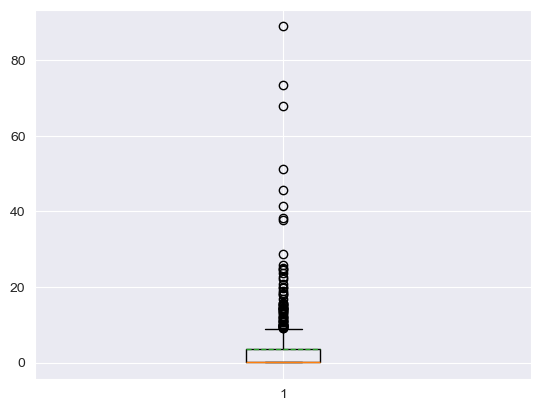

In [9]:
# 对数据集做离散化度量：对第一个特征画盒图（箱线图），检查孤立点（离群点）
plt.boxplot(X[:,0],showmeans=True,meanline=True)
plt.show()

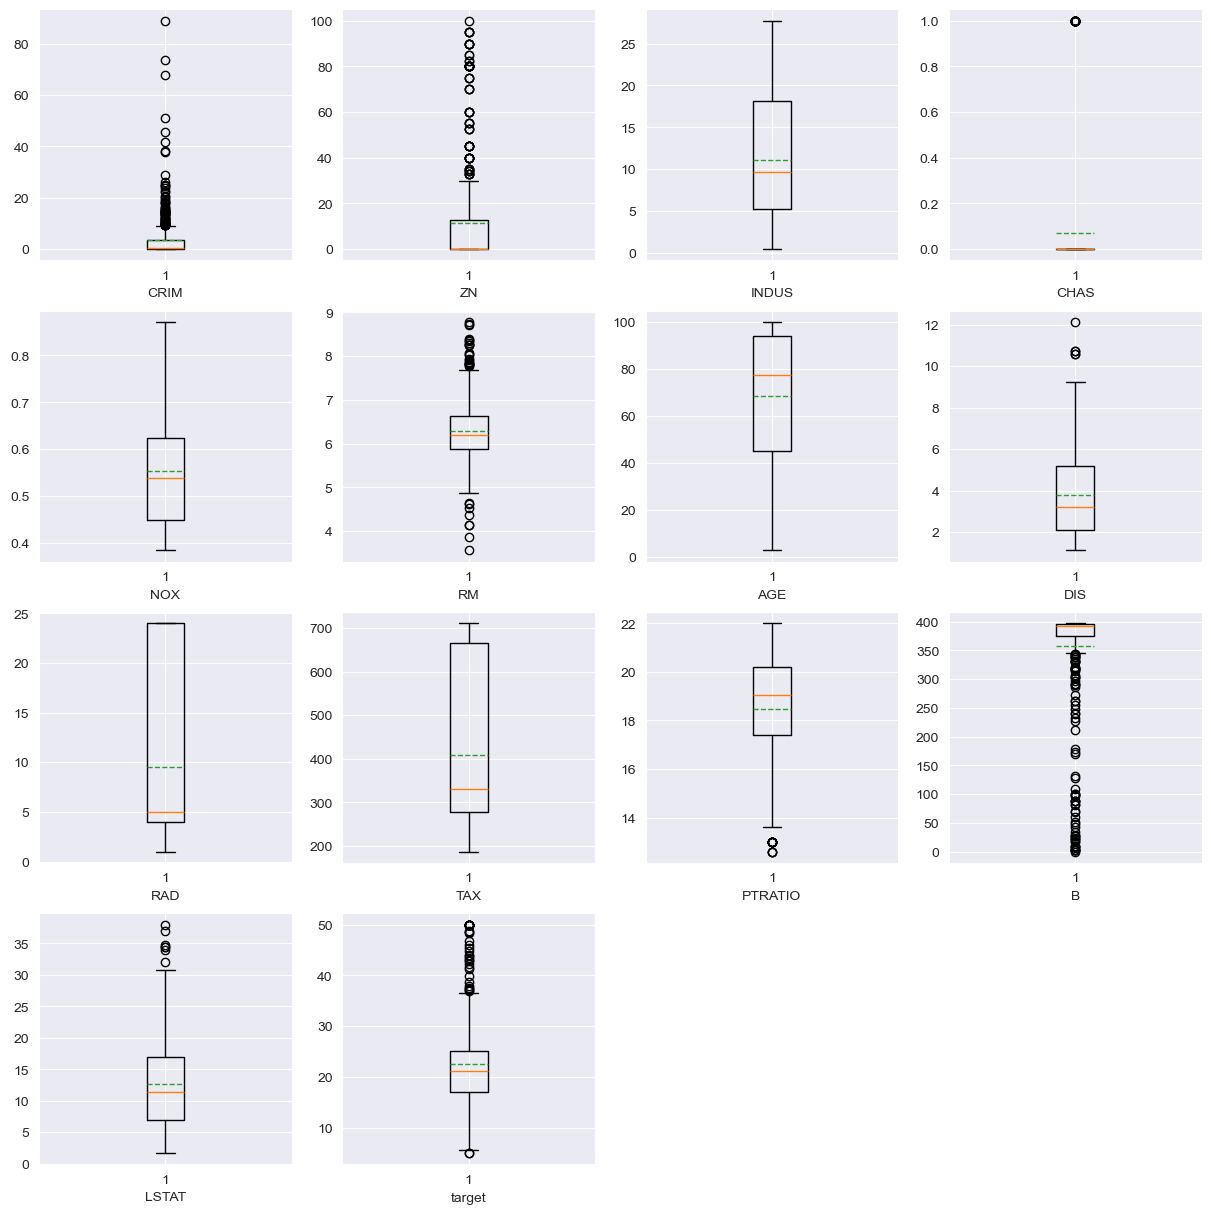

In [10]:
# 对所有特征画盒图（箱线图），检查孤立点（离群点）
plt.figure(figsize=(15, 15))
#对所有特征（收入中位数）画盒图（箱线图）
for i in range(X.shape[1]):
    plt.subplot(4,4,i+1)
    plt.boxplot(X[:,i],showmeans = True ,meanline = True)
    #x，y坐标轴标签
    plt.xlabel(housing['feature_names'][i])
plt.subplot(4,4,14)
#绘制直方图
plt.boxplot(y, showmeans = True ,meanline = True)
#x，y坐标轴标签
plt.xlabel('target')
plt.show()

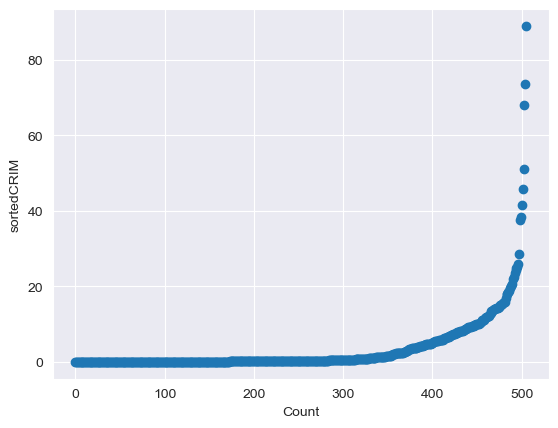

In [11]:
# 第一个特征排序后画散点图
x_sorted=np.sort(df.iloc[:,0].values)
# 画散点图
plt.scatter([i for i in range(X.shape[0])],x_sorted)
# 画x,y坐标轴标签
plt.xlabel('Count')
plt.ylabel('sorted'+housing['feature_names'][0])
plt.show()

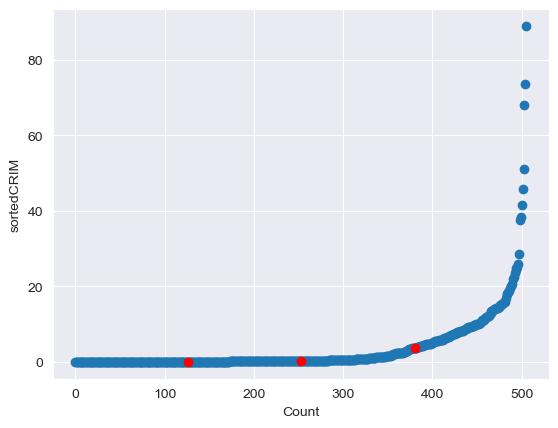

In [12]:
# 对第一个特征画分位数图
x_sorted=np.sort(df.iloc[:,0].values)
# 画散点图
plt.scatter([i for i in range(X.shape[0])],x_sorted)
# 画中位数点
plt.scatter([round(X.shape[0]/4),round(X.shape[0]/2),round(X.shape[0]*3/4)],
           [np.quantile(x_sorted,0.25),np.quantile(x_sorted,0.5),np.quantile(x_sorted,0.75)],color='red')
# 画x,y坐标轴标签
plt.xlabel('Count')
plt.ylabel('sorted'+housing['feature_names'][0])
plt.show()

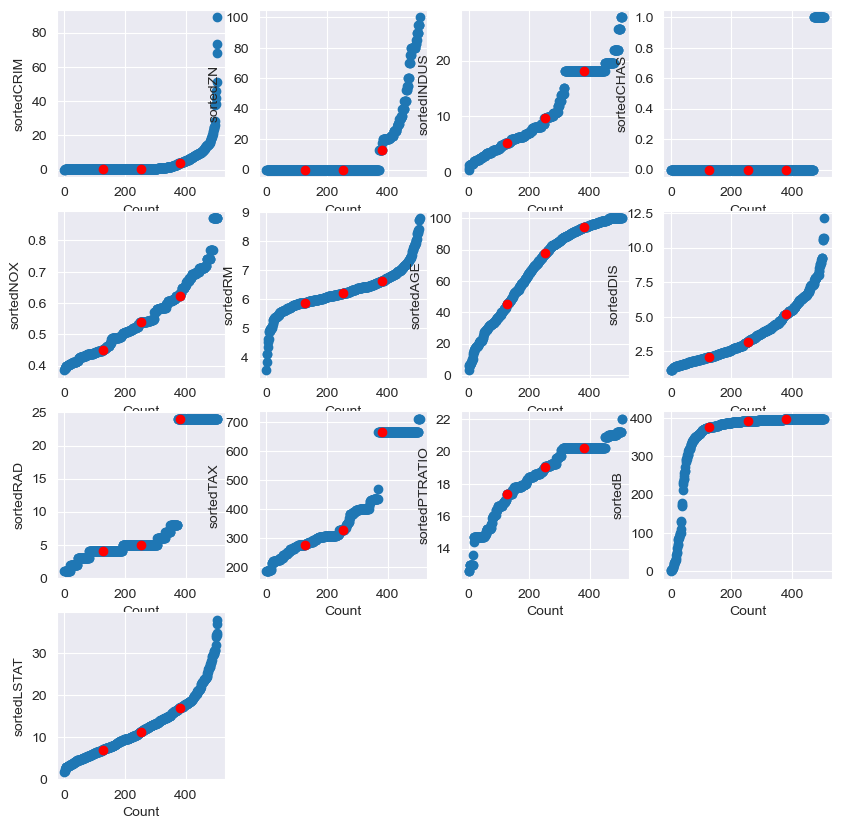

In [13]:
# 对所有特征画分位数图
plt.figure(figsize=(10, 10))
for j in range(X.shape[1]):
 
    # 对第一个特征（收入中位数）数据排序
    x_sorted=np.sort(df.iloc[:,j].values)
    plt.subplot(4,4,j+1)
    # 画散点图
    plt.scatter([i for i in range(X.shape[0])],x_sorted)
    # 画中位数点
    plt.scatter([round(X.shape[0]/4),round(X.shape[0]/2),round(X.shape[0]*3/4)],
                [np.quantile(x_sorted,0.25),np.quantile(x_sorted,0.5),np.quantile(x_sorted,0.75)],color='red')
    # 画x,y坐标轴标签
    plt.xlabel('Count')
    plt.ylabel('sorted'+housing['feature_names'][j])
plt.subplot(4,4,13)
plt.show()

In [14]:
# 使用线性回归方法拟合第一个特征
import numpy as np
X_list=[i for i in range(X.shape[0])]
X_array=np.array(X_list)
# 转换为矩阵
X_reshape=X_array.reshape(X.shape[0],1)
# 排序
x_sorted=np.sort(df.iloc[:,0].values)

# 定义线性回归模型
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.column_stack((np.ones_like(X), X))  
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

        # 提取斜率和截距
        self.intercept_ = self.coefficients[0]
        self.coef_ = self.coefficients[1:]

    def predict(self, X):
        return self.intercept_ + np.dot(X, self.coef_)

    def score(self, X, y):
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y))**2)
        ss_residual = np.sum((y - y_pred)**2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

# 创建线性回归模型
linear = LinearRegression()

# 进行线性回归拟合
linear.fit(X_reshape, x_sorted)

# 对训练结果做拟合度评分
print("Training score: ", linear.score(X_reshape, x_sorted))


Training score:  0.339581626227496


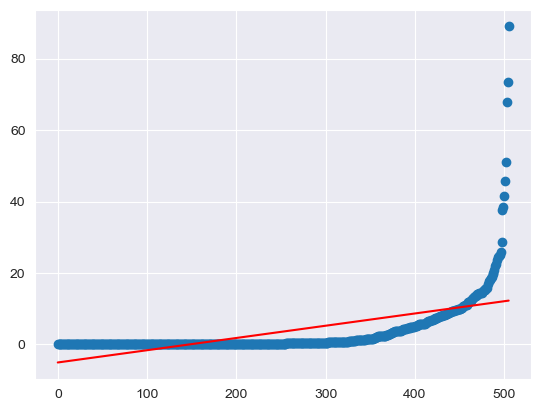

In [15]:
plt.scatter(X_list,x_sorted)
 
y_predict=linear.predict(X_reshape)
plt.plot(X_reshape,y_predict,color='red')
plt.show()

In [16]:
X_list=[i for i in range(X.shape[0])]
X_array=np.array(X_list)
# 转换为矩阵
X_reshape=X_array.reshape(X.shape[0],1)
# 排序
x_sorted=np.sort(df.iloc[:,0].values)
#from sklearn import linear_model
#linear=linear_model.LinearRegression()
#linear=linear_model.Lasso(fit_intercept=False)
# 进行Lasso局部回归拟合
#linear.fit(X_reshape,x_sorted)
# 对训练结果做拟合度评分
#print("training score: ",linear.score(X_reshape,x_sorted))
#plt.scatter(X_list,x_sorted)
 
#y_predict=linear.predict(X_reshape)
#plt.plot(X_reshape,y_predict,color='red')
#plt.show()

Training score:  0.2532371067254202


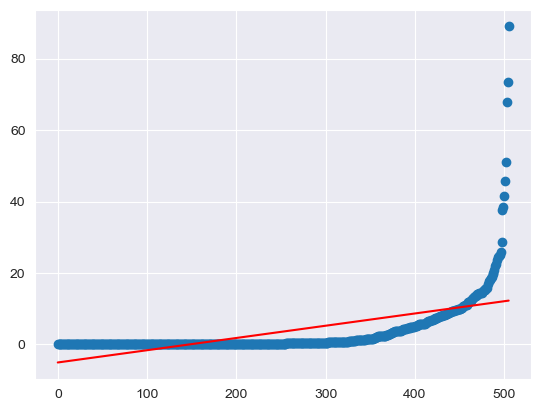

In [17]:
# 使用局部回归（Loess）曲线（用一条曲线拟合散点图）方法拟合第一个特征数据
# 手搓lasso回归
class LassoRegression:
    def __init__(self, alpha=1.0, fit_intercept=False):
        self.alpha = alpha
        self.fit_intercept = fit_intercept
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        if self.fit_intercept:
            X = np.c_[np.ones((X.shape[0], 1)), X]

        # 使用坐标下降法进行Lasso回归拟合
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0.0

        for epoch in range(1000):  
            for j in range(n_features):
                X_j = X[:, j]
                rho = X_j @ (y - np.dot(X, self.coef_) + self.coef_[j] * X_j)
                if j == 0 and self.fit_intercept:
                    self.intercept_ = rho
                else:
                    soft_threshold = np.sign(rho) * max(0, np.abs(rho) - self.alpha)
                    self.coef_[j] = soft_threshold / (np.sum(X_j ** 2) + 1e-6)

    def predict(self, X):
        if self.fit_intercept:
            X = np.c_[np.ones((X.shape[0], 1)), X]
        return X @ self.coef_ + self.intercept_

    def score(self, X, y):
        y_pred = self.predict(X)
        ss_residual = np.sum((y - y_pred) ** 2)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

# 创建Lasso回归模型
lasso = LassoRegression(alpha=0.01,fit_intercept=False)
lasso.fit(X_reshape, x_sorted)
# 对训练结果做拟合度评分
print("Training score: ", lasso.score(X_reshape, x_sorted))

plt.scatter(X_list,x_sorted)
 
y_predict=linear.predict(X_reshape)
plt.plot(X_reshape,y_predict,color='red')
plt.show()

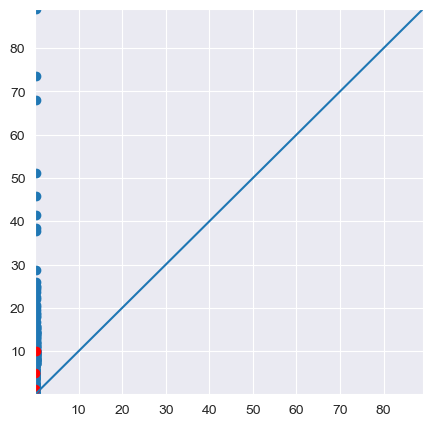

In [18]:
# 对第三个特征分两段画分位数-分位数图
plt.figure(figsize=(5,5))
 
df_new1=df[df['INDUS']<=df['INDUS'].mean()]
df_new2=df[df['INDUS']>df['INDUS'].mean()]
 
part1=np.sort(df_new1.iloc[:,0].values)[:df_new2['INDUS'].count()]
part2=np.sort(df_new2.iloc[:,0].values)[:df_new2['INDUS'].count()]
 
plt.xlim(part2[0],part2[-1])
plt.ylim(part2[0],part2[-1])
plt.plot([part2[0],part2[-1]],[part2[0],part2[-1]])
 
plt.scatter(part1,part2)
plt.scatter([np.quantile(part1,0.25),np.quantile(part1,0.5),np.quantile(part1,0.75)],
            [np.quantile(part2,0.25),np.quantile(part2,0.5),np.quantile(part2,0.75)],color='red')
plt.show()

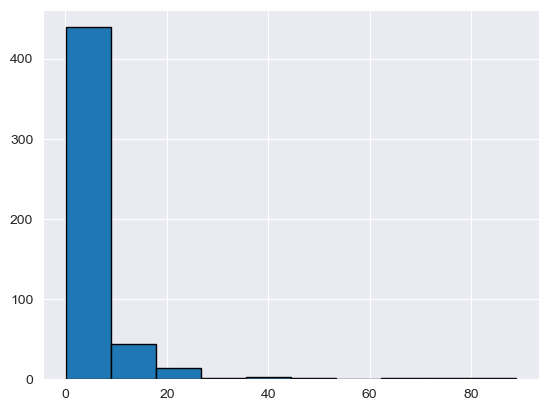

In [19]:
#  画直方图，查看各个特征的分布和数据倾斜情况
plt.hist(X[:,0],edgecolor='k')
plt.show()

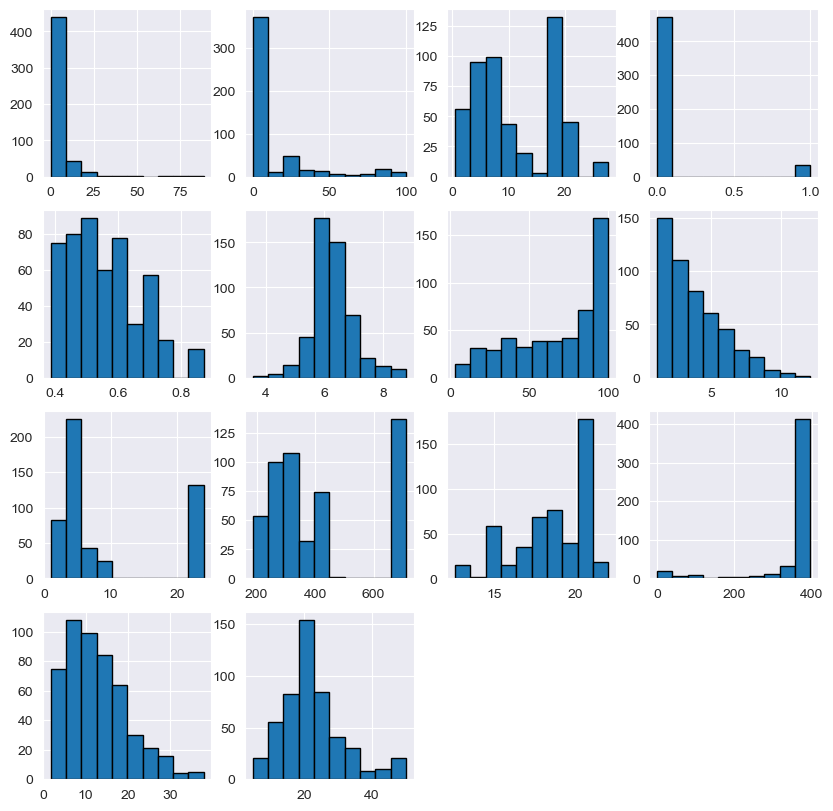

In [20]:
# 对所有特征画直方图，查看数据的分布和数据倾斜情况
plt.figure(figsize=(10, 10))
for i in range(X.shape[1]):
    plt.subplot(4,4,i+1)
    plt.hist(X[:,i],edgecolor='k')
plt.subplot(4,4,14)
plt.hist(y,edgecolor='k')
plt.show()

In [21]:
# 寻找所有特征之间的相关性并找出相关性大于 0.7 的特征对，做特征规约
for column in df.columns:
    correlations_data=df.corr()[column].sort_values()
    for key in correlations_data.keys():
        if key != column and abs(correlations_data[key]) >= 0.7:
            print('%s vs %s:' %(column,key),correlations_data[key])    

INDUS vs DIS: -0.7080269887427675
INDUS vs TAX: 0.7207601799515422
INDUS vs NOX: 0.7636514469209139
NOX vs DIS: -0.7692301132258282
NOX vs AGE: 0.7314701037859592
NOX vs INDUS: 0.7636514469209139
AGE vs DIS: -0.747880540868632
AGE vs NOX: 0.7314701037859592
DIS vs NOX: -0.7692301132258282
DIS vs AGE: -0.747880540868632
DIS vs INDUS: -0.7080269887427675
RAD vs TAX: 0.9102281885331865
TAX vs INDUS: 0.7207601799515422
TAX vs RAD: 0.9102281885331865
LSTAT vs target: -0.7376627261740145
target vs LSTAT: -0.7376627261740145


# 波士顿房价数据进行模拟训练（切分数据集7:3）

In [22]:
def train_test_split(X, y, test_size=0.3, random_state=None):
    
    if random_state is not None:
        np.random.seed(random_state)

    # 获取数据集的长度
    total_samples = len(X)

    # 计算测试集的大小
    test_samples = int(total_samples * test_size)

    # 生成随机索引
    indices = np.arange(total_samples)
    np.random.shuffle(indices)

    # 划分数据集
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]

    # 调整y_train和y_test的顺序
    y_train = np.array([y[i] for i in train_indices])
    y_test = np.array([y[i] for i in test_indices])

    X_train = np.array([X[i] for i in train_indices])
    X_test = np.array([X[i] for i in test_indices])

    return X_train, X_test, y_train, y_test

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('y_train = ', y_train)
print('y_test = ', y_test)
#调库
#from sklearn.model_selection import train_test_split
#X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#print('y_train = ', y_train)
#print('y_test = ', y_test)
 

y_train =  [28.7 14.4 24.4 18.1 22.5 20.5 15.2 17.4 13.6  8.7 18.2 35.4 31.7 33.
 22.2 20.4 23.9 25.  12.7 29.1 12.  17.7 27.  20.6 10.2 17.5 19.7 29.8
 20.5 14.9 10.9 19.5 22.7 19.5 24.6 25.  24.5 50.  14.3 11.8 31.  28.7
 16.2 43.5 25.  22.  19.9 22.1 46.  22.9 20.2 43.1 34.6 13.8 24.3 21.5
 24.4 21.2 23.8 26.6 25.1  9.6 19.4 19.4  9.5 14.  26.5 13.8 34.7 16.3
 21.7 17.5 15.6 20.9 21.7 12.7 18.5 23.7 19.3 12.7 21.6 23.2 29.6 21.2
 23.8 17.1 22.  36.5 18.8 21.9 23.1 20.2 17.4 37.  24.1 36.2 15.7 32.2
 13.5 17.9 13.3 11.7 41.7 18.4 13.1 25.  21.2 16.  34.9 25.2 24.8 21.5
 23.4 18.9 10.8 21.  27.5 17.5 13.5 28.7 14.8 19.1 28.6 13.1 19.  11.3
 13.3 22.4 20.1 18.2 22.9 20.6 25.  12.8 34.9 23.7 50.  29.  30.1 22.
 15.6 23.3 30.1 14.3 22.8 50.  20.8  6.3 34.9 32.4 19.9 20.3 17.8 23.1
 20.4 23.2  7.  16.8 46.7 50.  22.9 23.9 21.4 21.7 15.4 15.3 23.1 23.9
 19.4 11.9 17.8 31.5 33.8 20.8 19.8 22.4  5.  24.5 19.4 15.1 18.2 19.3
 27.1 20.7 37.6 11.7 33.4 30.1 21.4 45.4 20.1 20.8 26.4 10.4 21.8 32

# 波士顿房价数据进行模型训练

In [23]:
# 对全部特征（不切片）使用线性回归算法进行训练，显示训练集拟合度和测试集拟合度
class LinearRegression:
    def __init__(self):
        self.coef_ = None  # 系数
        self.intercept_ = None  # 截距

    def fit(self, X, y):
        # 添加偏置项
        X_bias = np.c_[np.ones(X.shape[0]), X]

        # 使用最小二乘法计算参数
        theta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

        # 设置模型参数
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

    def predict(self, X):
        # 添加偏置项
        X_bias = np.c_[np.ones(X.shape[0]), X]

        # 预测
        return X_bias @ np.concatenate(([self.intercept_], self.coef_))

    def score(self, X, y):
        # 预测
        y_pred = self.predict(X)

        # 计算 R^2 分数
        numerator = ((y - y_pred) ** 2).sum()
        denominator = ((y - y.mean()) ** 2).sum()
        r2 = 1 - (numerator / denominator)

        return r2

    
model = LinearRegression()
model.fit(X_train,y_train)
print('\nTrain score:',model.score(X_train,y_train))
print('Test score:',model.score(X_test,y_test))
#线性回归
#from sklearn import linear_model
#model = linear_model.LinearRegression()
# model.fit(wine_X_train,wine_y_train)
 
# 模型训练及评估
#model.fit(X_train,y_train)
#print('\nTrain score:',model.score(X_train,y_train))
#print('Test score:',model.score(X_test,y_test))


Train score: 0.764386271781068
Test score: 0.6733784121912816


In [24]:
# 数据预处理，按列归一化
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
def scale(X, axis=0):
    mean = np.mean(X, axis=axis, keepdims=True)
    std = np.std(X, axis=axis, keepdims=True)
    scaled_X = (X - mean) / std
    return scaled_X
# 对训练集进行归一化
X_train= scale(X_train)
# 对测试集进行归一化
X_test = scale(X_test)

## 梯度下降

In [25]:
# 线性回归之梯度下降法
class SGDRegressor:
    def __init__(self, learning_rate=0.1, n_iterations=2000, regularization_strength=0.01):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization_strength = regularization_strength
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # 初始化权重和偏差
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iterations):
            # 计算预测值
            y_pred = np.dot(X, self.weights) + self.bias

            # 计算梯度
            grad_weights = -2 * np.dot(X.T, (y - y_pred)) / X.shape[0] + 2 * self.regularization_strength * self.weights
            grad_bias = -2 * np.sum(y - y_pred) / X.shape[0]

            # 更新权重和偏差
            self.weights -= self.learning_rate * grad_weights
            self.bias -= self.learning_rate * grad_bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        y_pred = self.predict(X)
        ssr = np.sum((y_pred - np.mean(y))**2)
        sse = np.sum((y - y_pred)**2)
        r_squared = 1 - (sse / ssr)
        return r_squared

# 调整正则化强度
model = SGDRegressor()
model.fit(X_train, y_train)
print('\nTrain score:',model.score(X_train,y_train))
print('Test score:',model.score(X_test,y_test))

#from sklearn import preprocessing
# 数据预处理，按列归一化
#X_train=preprocessing.scale(X_train)
#X_test=preprocessing.scale(X_test)
# 线性回归之梯度下降法
#from sklearn import linear_model
#model=linear_model.SGDRegressor()
# 模型训练及评估
#model.fit(X_train,y_train)
#print('\nTrain score:',model.score(X_train,y_train))
#print('Test score:',model.score(X_test,y_test))


Train score: 0.6871112758806356
Test score: 0.5127520782442461


In [26]:
# 将随机森林算法用于回归问题：将波士顿房价数据集按7:3切分为训练集和测试集，显示训练集准确度和测试集准确度
class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def mean_squared_error(self, y):
        return np.mean((y - np.mean(y))**2)

    def fit(self, X, y):
        self.tree = self._fit(X, y, depth=0)

    def _fit(self, X, y, depth):
        if len(set(y)) == 1 or depth == self.max_depth:
            return np.mean(y)

        num_features = X.shape[1]
        feature_indices = np.random.choice(num_features, int(np.sqrt(num_features)), replace=False)

        best_feature, best_threshold = self._find_best_split(X, y, feature_indices)

        if best_feature is None:
            return np.mean(y)

        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices

        left_tree = self._fit(X[left_indices, :], y[left_indices], depth + 1)
        right_tree = self._fit(X[right_indices, :], y[right_indices], depth + 1)

        return (best_feature, best_threshold, left_tree, right_tree)

    def _find_best_split(self, X, y, feature_indices):
        best_feature = None
        best_threshold = None
        best_score = float('inf')

        for feature in feature_indices:
            thresholds = np.unique(X[:, feature])

            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = ~left_indices

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                mse = len(y[left_indices]) * self.mean_squared_error(y[left_indices]) + \
                      len(y[right_indices]) * self.mean_squared_error(y[right_indices])

                if mse < best_score:
                    best_feature = feature
                    best_threshold = threshold
                    best_score = mse

        return best_feature, best_threshold
    
    def predict(self, X):
        if self.tree is None:
            raise ValueError("The tree is not fitted yet. Call fit() first.")
        return np.array([self._predict_sample(sample) for sample in X])

    def _predict_sample(self, sample):
        node = self.tree
        while not isinstance(node, float):
            feature, threshold, left, right = node
            if sample[feature] < threshold:
                node = left
            else:
                node = right
        return node


class RandomForestRegressor:
    def __init__(self, n_estimators=10, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            indices = np.random.choice(len(X), len(X), replace=True)
            tree.fit(X[indices, :], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

    def score(self, X, y):
        y_pred = self.predict(X)
        return 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)
    
model = RandomForestRegressor(n_estimators=10, max_depth=None)
model.fit(X_train,y_train)
print('Train score:%f' % (model.score(X_train,y_train)))
print('Test score:%f' % (model.score(X_test,y_test)))
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor()
# 训练评估
#model.fit(X_train,y_train)
#print('Train score:%f' % (model.score(X_train,y_train)))
#print('Test score:%f' % (model.score(X_test,y_test)))

Train score:0.967643
Test score:0.697602


In [27]:
#函数前面已写
housing_X=scale(X)
X_train, X_test, y_train, y_test = train_test_split(housing_X, y, test_size=0.3, random_state=0)
#一个决策树
class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def mean_squared_error(self, y):
        return np.mean((y - np.mean(y))**2)

    def fit(self, X, y):
        self.tree = self._fit(X, y, depth=0)

    def _fit(self, X, y, depth):
        if len(set(y)) == 1 or depth == self.max_depth:
            return np.mean(y)

        num_features = X.shape[1]
        feature_indices = np.random.choice(num_features, int(np.sqrt(num_features)), replace=False)

        best_feature, best_threshold = self._find_best_split(X, y, feature_indices)

        if best_feature is None:
            return np.mean(y)

        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices

        left_tree = self._fit(X[left_indices, :], y[left_indices], depth + 1)
        right_tree = self._fit(X[right_indices, :], y[right_indices], depth + 1)

        return (best_feature, best_threshold, left_tree, right_tree)

    def _find_best_split(self, X, y, feature_indices):
        best_feature = None
        best_threshold = None
        best_score = float('inf')

        for feature in feature_indices:
            thresholds = np.unique(X[:, feature])

            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = ~left_indices

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                mse = len(y[left_indices]) * self.mean_squared_error(y[left_indices]) + \
                      len(y[right_indices]) * self.mean_squared_error(y[right_indices])

                if mse < best_score:
                    best_feature = feature
                    best_threshold = threshold
                    best_score = mse

        return best_feature, best_threshold
    
    def predict(self, X):
        if self.tree is None:
            raise ValueError("The tree is not fitted yet. Call fit() first.")
        return np.array([self._predict_sample(sample) for sample in X])

    def _predict_sample(self, sample):
        node = self.tree
        while not isinstance(node, float):
            feature, threshold, left, right = node
            if sample[feature] < threshold:
                node = left
            else:
                node = right
        return node

# 将GBDT算法用于回归问题：将波士顿房价数据集按7:3切分为训练集和测试集，显示训练集准确度和测试集准确度
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []
        self.initial_prediction = np.mean(y)

        for i in range(self.n_estimators):
            residuals = y - self.predict(X)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals * self.learning_rate)
            self.trees.append(tree)

    def predict(self, X):
        return self.initial_prediction + np.sum([tree.predict(X) for tree in self.trees], axis=0)

    def score(self, X, y):
        y_pred = self.predict(X)
        return 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)
model=GradientBoostingRegressor(random_state=3)
# 模型训练及评估
model.fit(X_train,y_train)
print('Train score:%f' % (model.score(X_train,y_train)))
print('Test score:%f' % (model.score(X_test,y_test)))
#from sklearn import preprocessing
#housing_X=preprocessing.scale(X)
#X_train, X_test, y_train, y_test = train_test_split(housing_X, y, test_size=0.3, random_state=0)
# GBDT算法
#from sklearn.ensemble import GradientBoostingRegressor
#model=GradientBoostingRegressor(random_state=3)
# 模型训练及评估
#model.fit(X_train,y_train)
#print('Train score:%f' % (model.score(X_train,y_train)))
#print('Test score:%f' % (model.score(X_test,y_test)))

Train score:0.980636
Test score:0.789998


In [28]:
# 将岭回归算法用于回归问题：将波士顿房价数据集按7:3切分为训练集和测试集，显示训练集拟合度和测试集拟合度；导入sklearn的MSE和MAE方法计算均方误差和平均绝对误差评价指标
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # 添加偏置列
        X = np.c_[np.ones((X.shape[0], 1)), X]
        
        # 计算岭回归参数
        XTX = X.T @ X
        regularizer = self.alpha * np.eye(XTX.shape[0])
        inverse = np.linalg.inv(XTX + regularizer)
        self.coef_ = inverse @ X.T @ y
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        # 添加偏置列
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return X @ np.insert(self.coef_, 0, self.intercept_)
    def score(self, X, y):
        y_pred = self.predict(X)
        mean_y = np.mean(y)
        ss_residual = np.sum((y - y_pred) ** 2)
        ss_total = np.sum((y - mean_y) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        if self.mean_ is None or self.std_ is None:
            raise ValueError("Scaler not fitted. Call fit() before transforming data.")
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_predict=model.predict(X_test)
model = RidgeRegression(alpha=0.3)
model.fit(X_train,y_train)
print("\ntraining score: ",model.score(X_train,y_train))
print("Test score: ",model.score(X_test,y_test))
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2
print("均方误差为： ",mean_squared_error(y_test,y_predict))
print("平均绝对误差为：",mean_absolute_error(y_test,y_predict))
print("R_squared：",r2_score(y_test,y_predict))
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import r2_score
#model=linear_model.Ridge(alpha=0.3)
 
#model.fit(X_train,y_train)
#print("\ntraining score: ",model.score(X_train,y_train))
#print("Test score: ",model.score(X_test,y_test))
#y_predict=model.predict(X_test)
#print("均方误差为： ",mean_squared_error(y_test,y_predict))
#print("平均绝对误差为：",mean_absolute_error(y_test,y_predict))
#print("R_squared：",r2_score(y_test,y_predict))


training score:  0.7643801079276138
Test score:  0.6730836221219418
均方误差为：  19.07302952237545
平均绝对误差为： 2.651516624143778
R_squared： 0.771637960191657


# 测试值与预测值之间的差距

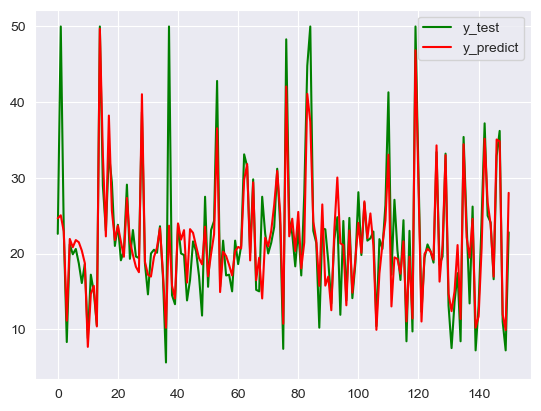

In [29]:
plt.plot(y_test,c="green",label="y_test")
plt.plot(y_predict,c="red",label="y_predict")
plt.legend()
plt.show()